In [2]:
import pandas as pd
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from modules.autocorrelation import autoCorrelation
from scipy.optimize import curve_fit
from modules.utilityFunctions import autocorrelationExponential, autocorrelationProduct

In [3]:
pathData = '../../data/realData/'

In [4]:
corrLengths25 = pd.read_csv(
    pathData + 'Tanouchi/Tanouchi25/correlationLength25.csv')
corrLengths25['id'] = corrLengths25['id'].astype(int)
corrLengths37 = pd.read_csv(
    pathData + 'Tanouchi/Tanouchi37/correlationLength37.csv')
corrLengths37['id'] = corrLengths37['id'].astype(int)
lineages25DF = pd.read_csv(pathData + 'Tanouchi/Tanouchi25/Tanouchi25C.csv')
lineages37DF = pd.read_csv(pathData + 'Tanouchi/Tanouchi37/Tanouchi37C.csv')

In [5]:
def lineages(df: pd.DataFrame) -> List[np.array]:
    df['lineage_ID'] = df['lineage_ID'].astype(int)
    uniqueLineages: np.array = df['lineage_ID'].unique()
    returnDict: dict = {}
    for lineage in uniqueLineages:
        newDf: pd.DataFrame = df[df['lineage_ID'] == lineage]
        returnDict[f'{lineage}'] = np.array(newDf['length_birth'])

    return returnDict

In [6]:
def kthMoment(lineages: dict, k: float) -> dict:
    return ({key: np.mean(value**k) for key, value in lineages.items()})


def retrieveKthMoment(momentDict: dict, k: float) -> np.array:
    return np.array(list(kthMoment(momentDict, k).values()))


def momentRatio(momentDict: dict, k: float) -> np.array:
    moment1: np.array = retrieveKthMoment(momentDict, k + 1)
    moment2: np.array = retrieveKthMoment(momentDict, k)
    return moment1 / moment2


lineages25 = lineages(lineages25DF)
lineages37 = lineages(lineages37DF)


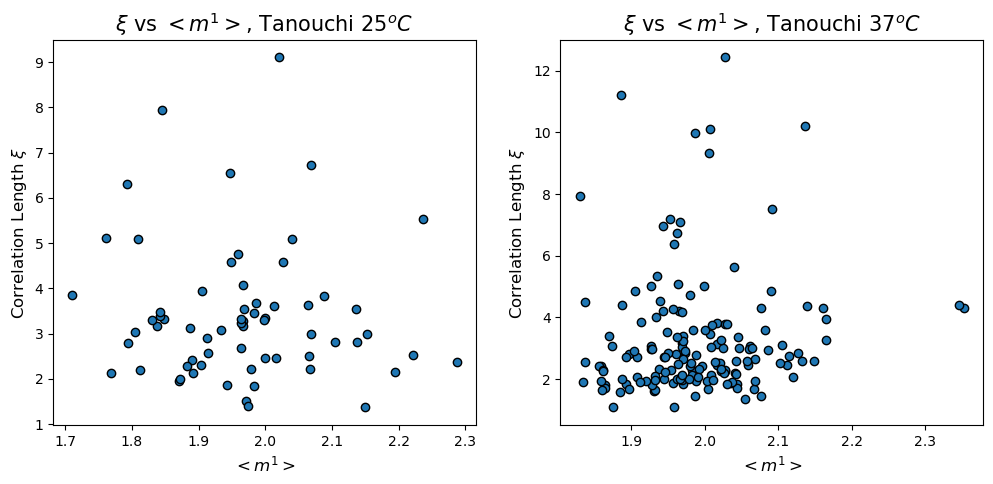

In [7]:
fig, ax_ = plt.subplots(1, 2, figsize=(12, 5))
k = 1
ax, ax1 = ax_.flatten()
ax.scatter(retrieveKthMoment(lineages25, k),
           corrLengths25['average'], edgecolor='black')
ax.set_xlabel(f'$<m^{k}>$', fontsize=12)
ax.set_ylabel('Correlation Length $\\xi$', fontsize=12)
_ = ax.set_title(f'$\\xi$ vs $<m^{k}>$, Tanouchi $25^oC$', fontsize=15)
ax1.scatter(retrieveKthMoment(lineages37, k),
            corrLengths37['average'], edgecolor='black')
ax1.set_xlabel(f'$<m^{k}>$', fontsize=12)
ax1.set_ylabel('Correlation Length $\\xi$', fontsize=12)
_ = ax1.set_title(f'$\\xi$ vs $<m^{k}>$, Tanouchi $37^oC$', fontsize=15)

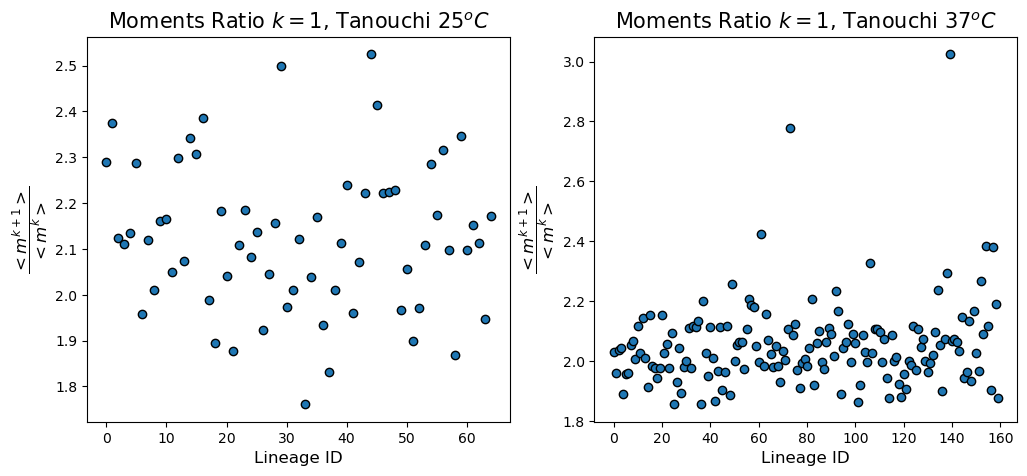

In [8]:
fig, ax_ = plt.subplots(1, 2, figsize=(12, 5))
k = 1
ax, ax1 = ax_.flatten()
ax.scatter(range(len(momentRatio(lineages25, k))),
           momentRatio(lineages25, k), edgecolor='black')
ax.set_xlabel('Lineage ID', fontsize=12)
ax.set_ylabel('$\\dfrac{<m^{k+1}>}{<m^{k}>}$', fontsize=12)
_ = ax.set_title(f'Moments Ratio $k={k}$, Tanouchi $25^oC$', fontsize=15)
ax1.scatter(range(len(momentRatio(lineages37, k))),
            momentRatio(lineages37, k), edgecolor='black')
ax1.set_xlabel('Lineage ID', fontsize=12)
ax1.set_ylabel('$\\dfrac{<m^{k+1}>}{<m^{k}>}$', fontsize=12)
_ = ax1.set_title(f'Moments Ratio $k={k}$, Tanouchi $37^oC$', fontsize=15)


## Susman


In [9]:
pathData = '../../data/realData/Susman/'
susmanDf = pd.read_csv(pathData + 'longLineages/susmanDataLL.csv')
susmanDf['lineage_ID'] = susmanDf['lineage_ID'].astype(int)
lineagesSusman = lineages(susmanDf)
corrParameterSusman = pd.read_csv(
    pathData + 'longLineages/correlationParameters.csv')
exampleLineage = susmanDf[susmanDf['lineage_ID'] == 1]
exampleTimeSeries = exampleLineage['length_birth']
exampleInstance = autoCorrelation.instantiateFromTimeSeries(exampleTimeSeries)
poptExample = exampleInstance.getCorrelationParameters(autocorrelationProduct)

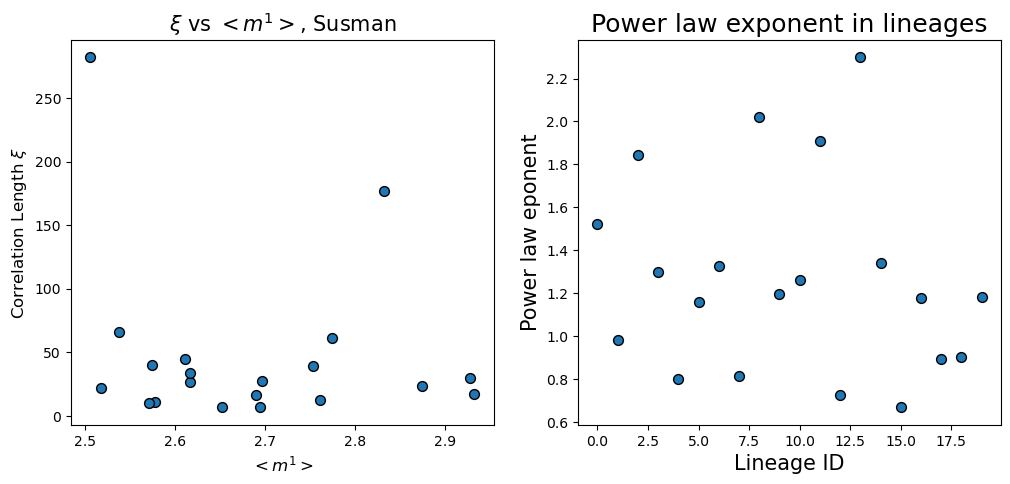

In [10]:
fig, ax_ = plt.subplots(1, 2, figsize=(12, 5))
ax, ax1 = ax_.flatten()
k = 1
ax.scatter(retrieveKthMoment(lineagesSusman, k),
           corrParameterSusman['correlation'], edgecolor='black', s=50)
ax.set_xlabel(f'$<m^{k}>$', fontsize=12)
ax.set_ylabel('Correlation Length $\\xi$', fontsize=12)
_ = ax.set_title(f'$\\xi$ vs $<m^{k}>$, Susman', fontsize=15)


ax1.scatter(range(len(corrParameterSusman['exponent'])),
            corrParameterSusman['exponent'], s=50, edgecolor='black')
ax1.set_xlabel('Lineage ID', fontsize=15)
ax1.set_ylabel('Power law eponent', fontsize=15)
_ = ax1.set_title('Power law exponent in lineages', fontsize=18)

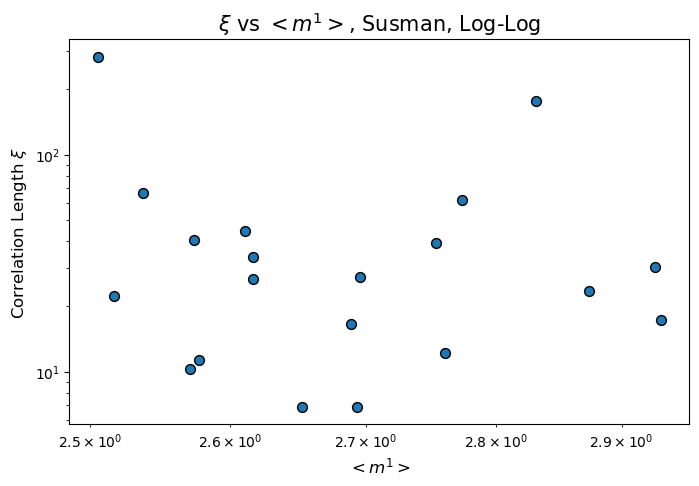

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
k = 1
ax.scatter(retrieveKthMoment(lineagesSusman, k),
           corrParameterSusman['correlation'], edgecolor='black', s=50)
ax.set_xlabel(f'$<m^{k}>$', fontsize=12)
ax.set_ylabel('Correlation Length $\\xi$', fontsize=12)
ax.set_title(f'$\\xi$ vs $<m^{k}>$, Susman, Log-Log', fontsize=15)

ax.set_xscale('log')
ax.set_yscale('log')

In [13]:
#plt.scatter(retrieveKthMoment(lineagesSusman, 1), corrParameterSusman['exponent'])

/Users/tommaso/Desktop/masterThesis/code/pythonApp/modules/utilityFunctions.py:19: RuntimeWarning: divide by zero encountered in power
  return x**(-eta) * np.exp(-x/xi)


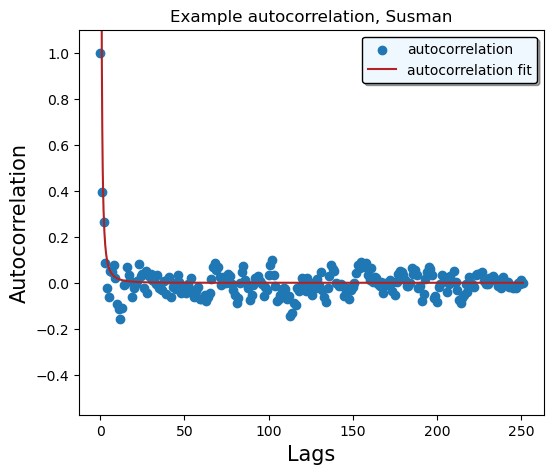

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.scatter(exampleInstance.lags - 1, exampleInstance.autocorrelation,
        label='autocorrelation')
ax.plot(exampleInstance.xAxis - 1, autocorrelationProduct(
    exampleInstance.xAxis - 1, *poptExample), color='firebrick', label='autocorrelation fit')
ax.legend(facecolor='aliceblue', edgecolor='black', shadow=True)
ax.set_xlabel('Lags', fontsize=15)
ax.set_ylabel('Autocorrelation', fontsize=15)
_ = ax.set_title('Example autocorrelation, Susman')
_= ax.set_ylim(top = 1.1)

## Example of fit


In [13]:
exampleLineage = lineages25['1']
autoCorrelation.instantiateFromTimeSeries(exampleLineage)
exampleInstance = autoCorrelation.all[0]
upperPeaks, lowerPeaks = exampleInstance.envelopePeaks()
interFuncUpper = exampleInstance.getInterpolatingFunction(upperPeaks)
interFuncLower = exampleInstance.getInterpolatingFunction(lowerPeaks)
poptUpper, _, _ = exampleInstance.getAutocorrelationFit(autocorrelationExponential, x=exampleInstance.xAxis,
                                                        y=exampleInstance.applyInterpolatingFunction(interFuncUpper, exampleInstance.xAxis))
poptLower, _, _ = exampleInstance.getAutocorrelationFit(autocorrelationExponential, x=exampleInstance.xAxis,
                                                        y=exampleInstance.applyInterpolatingFunction(interFuncLower, exampleInstance.xAxis))

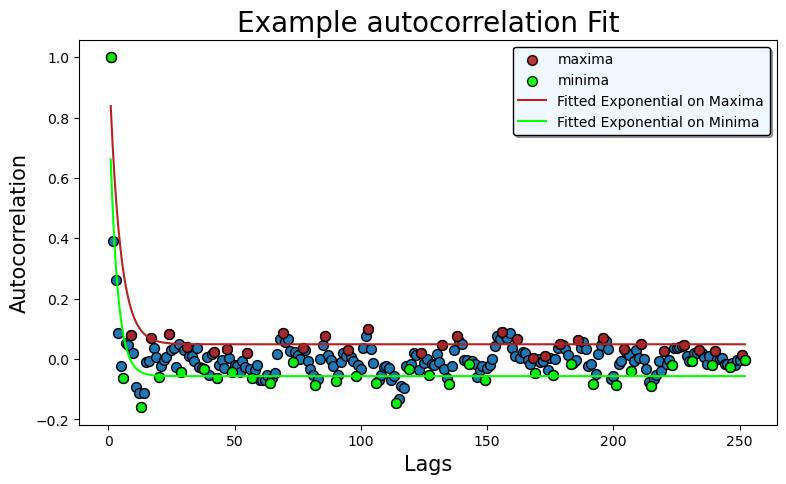

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
colorUpper = 'firebrick'
colorLower = 'lime'
ax.scatter(exampleInstance.lags[upperPeaks], exampleInstance.autocorrelation[upperPeaks],
           color=colorUpper, zorder=2, s=50, edgecolor='black', label='maxima', alpha=.9)
ax.scatter(exampleInstance.lags[lowerPeaks], exampleInstance.autocorrelation[lowerPeaks],
           color=colorLower, zorder=2, edgecolor='black', s=50, label='minima', alpha=.9)
ax.scatter(exampleInstance.lags, exampleInstance.autocorrelation,
           edgecolor='black', s=50)
ax.plot(exampleInstance.xAxis, autocorrelationExponential(exampleInstance.xAxis,
        *poptUpper), color=colorUpper, label='Fitted Exponential on Maxima', zorder=2)
ax.plot(exampleInstance.xAxis, autocorrelationExponential(exampleInstance.xAxis,
        *poptLower), color=colorLower, label='Fitted Exponential on Minima', zorder=2)
ax.set_xlabel('Lags', fontsize=15)
ax.set_ylabel('Autocorrelation', fontsize=15)
ax.set_title('Example autocorrelation Fit', fontsize=20)
_ = ax.legend(facecolor='aliceblue', edgecolor='black', shadow=True)


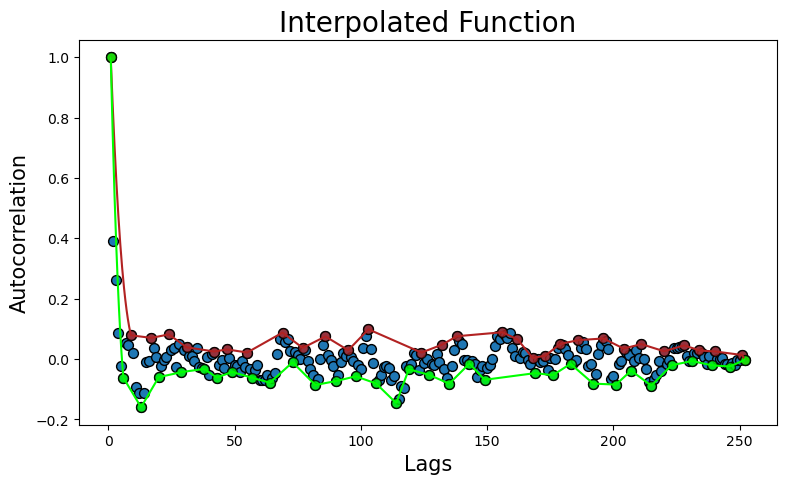

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.scatter(exampleInstance.lags[upperPeaks], exampleInstance.autocorrelation[upperPeaks],
           color=colorUpper, zorder=2, s=50, edgecolor='black', label='maxima', alpha=.8)
ax.scatter(exampleInstance.lags[lowerPeaks], exampleInstance.autocorrelation[lowerPeaks],
           color=colorLower, zorder=2, edgecolor='black', s=50, label='minima', alpha=.8)
ax.scatter(exampleInstance.lags, exampleInstance.autocorrelation,
           edgecolor='black', s=50)


interpolatingFunctionUpper = exampleInstance.getInterpolatingFunction(
    upperPeaks)
interpolatingFunctionLower = exampleInstance.getInterpolatingFunction(
    lowerPeaks)
ax.plot(exampleInstance.xAxis, exampleInstance.applyInterpolatingFunction(
    interpolatingFunctionUpper, exampleInstance.xAxis), color=colorUpper)
ax.plot(exampleInstance.xAxis, exampleInstance.applyInterpolatingFunction(
    interpolatingFunctionLower, exampleInstance.xAxis), color=colorLower)
ax.set_xlabel('Lags', fontsize=15)
ax.set_ylabel('Autocorrelation', fontsize=15)
_ = ax.set_title('Interpolated Function', fontsize=20)


### Iterative Agorithm


In [16]:
criticalPoint = 1 / np.log(2)
nGammas = 100
gammaGammaC = np.linspace(1e-2, 1e-6, nGammas)
gammaValues = criticalPoint - gammaGammaC

In [17]:
np.random.seed(1)
independentDraws = np.log(np.random.uniform(size=(nGammas, int(2e6))))
thirdTerm = -200
secondTerm = - (1/(gammaValues[:, np.newaxis])) * \
    (independentDraws.cumsum(axis=1))
firstTerm = -np.arange(1, int(2e6) + 1) * np.log(2)

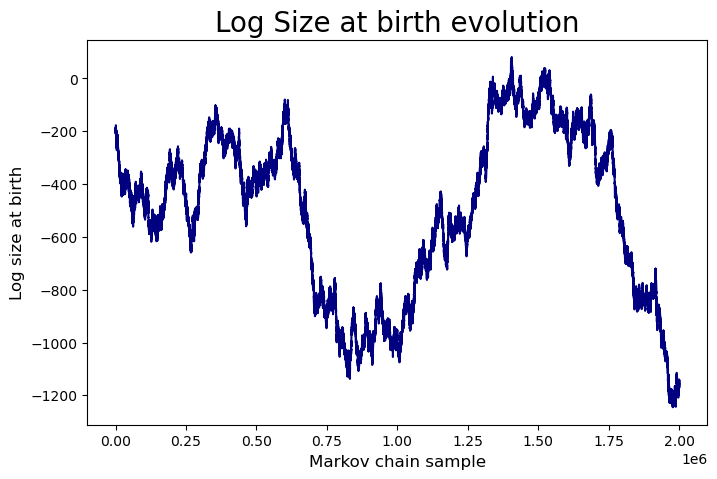

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(firstTerm + secondTerm[-1, :] + thirdTerm, color='navy')
ax.set_xlabel('Markov chain sample', fontsize=12)
ax.set_ylabel('Log size at birth', fontsize=12)
_ = ax.set_title('Log Size at birth evolution', fontsize=20)


In [19]:
sizesAtBirth = firstTerm + secondTerm + thirdTerm
sizesAtBirthConverged = sizesAtBirth[:, int(1e6):]

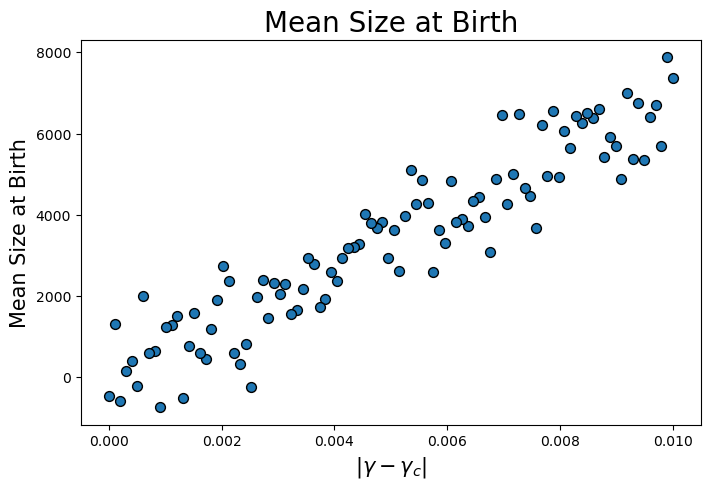

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
meanSizes = np.mean(sizesAtBirthConverged, axis=1)
ax.scatter(gammaGammaC, meanSizes, edgecolor='black', s=50)
ax.set_xlabel('$|\gamma - \gamma_c|$', fontsize=15)
ax.set_ylabel('Mean Size at Birth', fontsize=15)
_ = ax.set_title('Mean Size at Birth', fontsize=20)


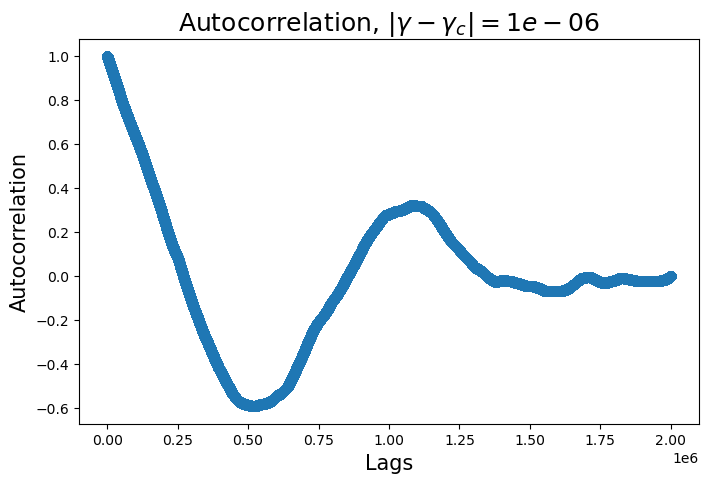

In [21]:
autocorrelation = acf(sizesAtBirth[-1, :], fft=True, nlags=len(
    sizesAtBirth[-1, :] - 1))

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(range(len(autocorrelation)), autocorrelation)
ax.set_xlabel('Lags', fontsize=15)
ax.set_ylabel('Autocorrelation', fontsize=15)
_ = ax.set_title(
    f'Autocorrelation, $|\gamma - \gamma_c| = {gammaGammaC[-1]}$', fontsize=18)


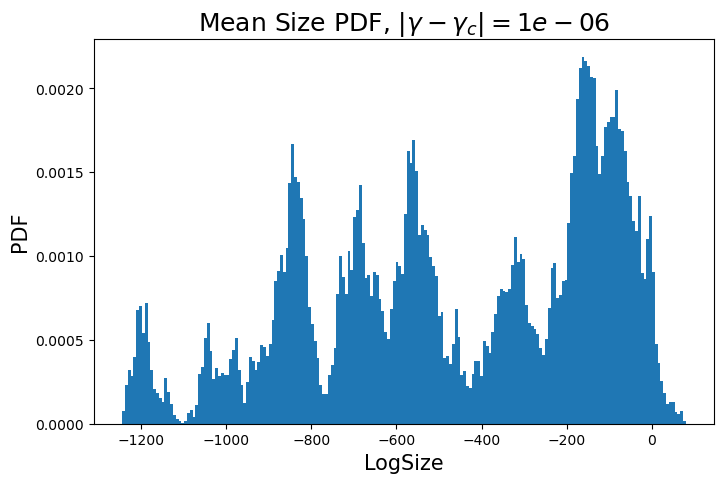

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(sizesAtBirthConverged[-1, :], bins=200, density=True)
ax.set_xlabel('LogSize', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
_ = ax.set_title(
    f'Mean Size PDF, $|\gamma - \gamma_c| = {gammaGammaC[-1]}$', fontsize=18)